In [76]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [77]:
HW = 22
P = 5
th = 0.987

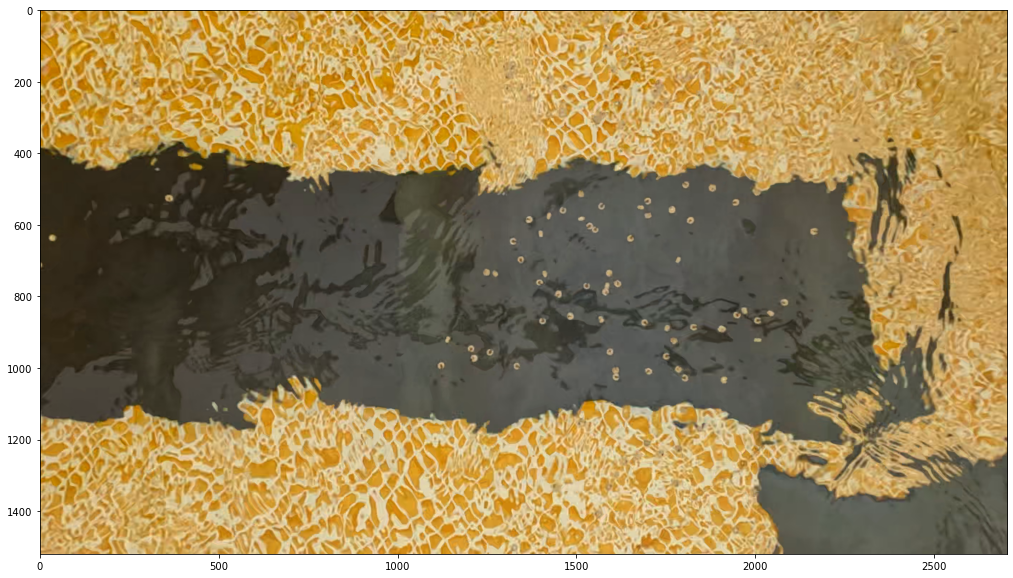

In [78]:
img  = cv2.imread("iwasa2/2270.bmp", 1)
img2 = img.copy()
fig, ax = plt.subplots(figsize=(18, 10))
plt.imshow(img)

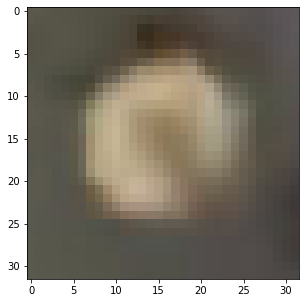

In [79]:
tracer_img = cv2.imread("iwasa/20.bmp", 1)
fig, ax = plt.subplots(figsize=(5, 5))
plt.imshow(tracer_img)

In [80]:
result = cv2.matchTemplate(img, tracer_img, cv2.TM_CCORR_NORMED)
np.where(result > th)

(array([ 473,  473,  481,  482,  482,  542,  543,  543,  543,  572,  572,
         572,  573,  603,  603,  682,  717,  718,  718,  718,  719,  719,
         719,  720,  720,  720,  721,  746,  749,  749,  939,  939,  940,
         977,  978,  978,  979, 1018, 1018], dtype=int64),
 array([1788, 1789, 1862, 1862, 1863, 1750, 1749, 1750, 1751, 1800, 1801,
        1802, 1801, 2145, 2146, 1327, 1232, 1232, 1574, 1575, 1573, 1574,
        1575, 1573, 1574, 1575, 1574, 1379, 1597, 1598, 1576, 1577, 1576,
        1104, 1104, 1105, 1316, 1895, 1896], dtype=int64))

In [81]:
res_th_j, res_th_i = np.where(result > th)

In [82]:
for n in range(len(res_th_i)):
    i, j = res_th_i[n], res_th_j[n]
    cv2.rectangle(img2, (i, j), (i+HW+2*P, j+HW+2*P), (255, 0, 0), 1)

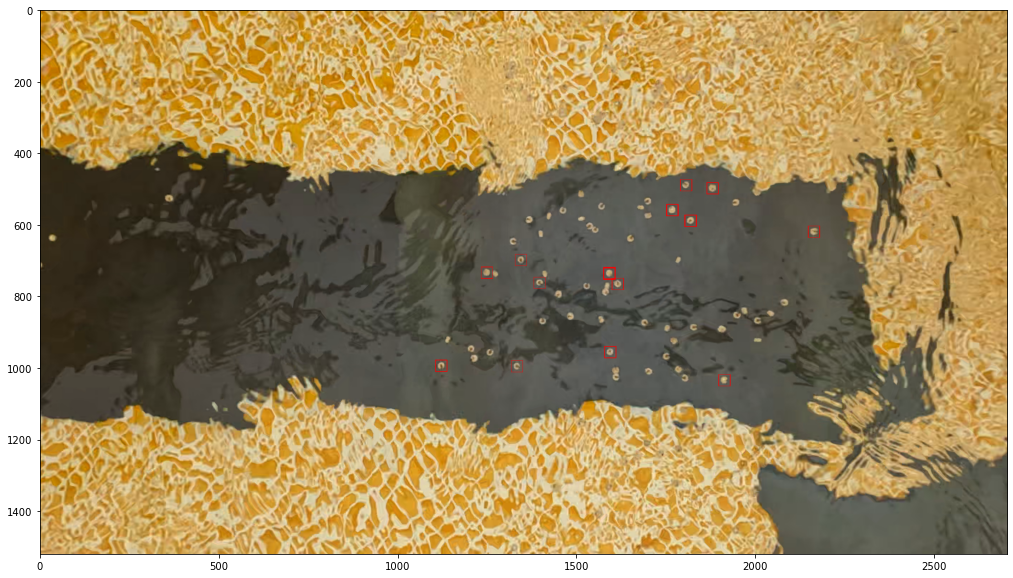

In [83]:
plt.figure(figsize=(18, 10))
plt.imshow(img2)
plt.show()

In [84]:
img2 = img.copy()
r_list = []

In [85]:
def is_same(ij, r):
    for a in range(-(HW+P)//4, (HW+P)//4+1):
        for b in range(-(HW+P)//4, (HW+P)//4+1):
            if (ij[0]+a, ij[1]+b) in r:
                return True
    return False

In [86]:
result2 = np.zeros([1, 2], dtype=np.uint8)

In [87]:
for i in tqdm(range(1216)):  # 2368
    tracer_img = cv2.imread(f"iwasa/{i}.bmp", 1)
    result = cv2.matchTemplate(img, tracer_img, cv2.TM_CCORR_NORMED)
    res_th_j, res_th_i = np.where(result > th)

    if res_th_i is None:
        continue
    else:
        res_th_i = res_th_i[:, np.newaxis]
        res_th_j = res_th_j[:, np.newaxis]
        tmp = np.hstack([res_th_i, res_th_j])
        result2 = np.vstack([result2, tmp])

result2 = result2[1:]

100%|██████████| 2368/2368 [06:50<00:00,  5.76it/s]


In [88]:
for n in tqdm(range(result2.shape[0])):
    i, j = result2[n, 0], result2[n, 1]
    if is_same((i, j), r_list):
        continue
    cv2.rectangle(img2, (i, j), (i+HW+2*P, j+HW+2*P), (255, 0, 0), 1)
    r_list.append((i, j))

100%|██████████| 59455/59455 [00:06<00:00, 8814.45it/s] 


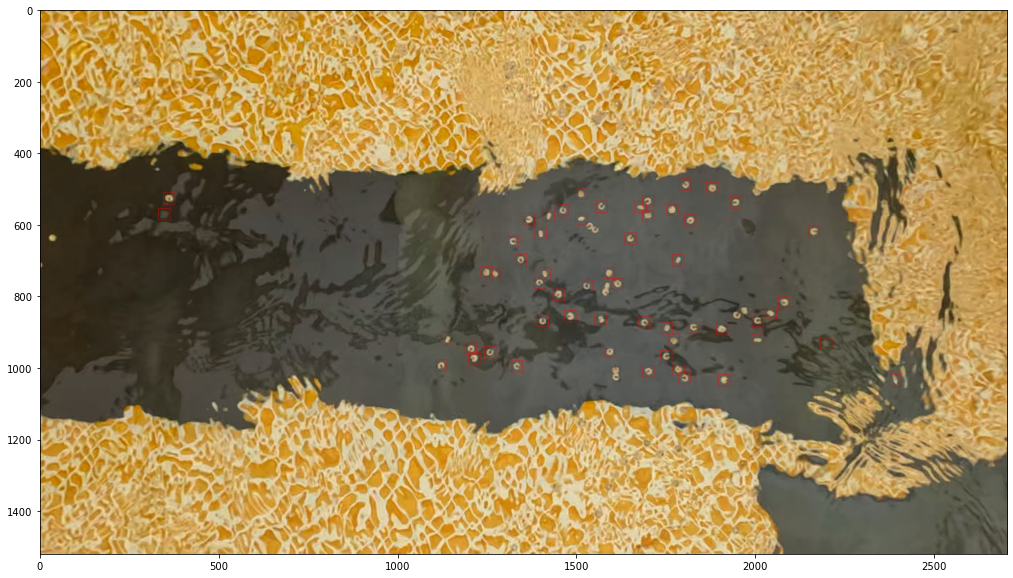

In [89]:
plt.figure(figsize=(18, 10))
plt.imshow(img2)
plt.show()

In [90]:
r_list2 = []

In [91]:
for i in tqdm(range(1216)):  # 2368
    tracer_img = cv2.imread(f"iwasa/{i}.bmp", 1)
    result = cv2.matchTemplate(img, tracer_img, cv2.TM_CCORR_NORMED)
    res_th_j, res_th_i = np.where(result > th)

    for n in range(len(res_th_i)):
        i, j = res_th_i[n], res_th_j[n]
        if is_same((i, j), r_list2):
            continue
        cv2.rectangle(img2, (i, j), (i+HW+2*P, j+HW+2*P), (255, 0, 0), 1)
        r_list2.append((i, j))

 39%|███▊      | 913/2368 [02:39<04:14,  5.73it/s]


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(18, 10))
plt.imshow(img2)
plt.show()